## HW 5 Solutions

## Ch 8 

### 80 points total


---
## Exercise 8.2:  The Lotka--Volterra equations

The Lotka--Volterra equations are a mathematical model of predator--prey interactions between biological species.  Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators).  You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.  Strictly the only allowed values of $x$ and $y$ would then be multiples of 0.001, since you can only have whole numbers of rabbits or foxes.  But 0.001 is a pretty close spacing of values, so it's a decent approximation to treat $x$ and $y$ as continuous real numbers so long as neither gets very close to zero.

In the Lotka--Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes: 

$$ \frac{dx}{dt} = \alpha x - \beta xy, $$

where $\alpha$ and $\beta$ are constants.  At the same time the foxes reproduce at a rate proportional the rate at which they eat rabbits--because they need food to grow and reproduce--but also die of old age at a rate proportional to their own population: 

$$ \frac{dy}{dt} = \gamma xy - \delta y, $$

where $\gamma$ and $\delta$ are also constants.

* a) Write a program to solve these equations using the fourth-order Runge--Kutta method for the case $\alpha=1$, $\beta = \gamma=0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.  Have the program make a graph showing both $x$ and $y$ as a function of time on the same axes from $t=0$ to $t=30$.  (Hint: Notice that the differential equations in this case do not depend explicitly on time $t$--in vector notation, the right-hand side of each equation is a function $f(r)$ with no $t$ dependence.  You may nonetheless find it convenient to define a Python function `f(r,t)` including the time variable, so that your program takes the same form as programs given earlier in this chapter.  You don't have to do it that way, but it can avoid some confusion.  Several of the following exercises have a similar lack of explicit time-dependence.)

* b) Describe in words what is going on in the system, in terms of rabbits and foxes.



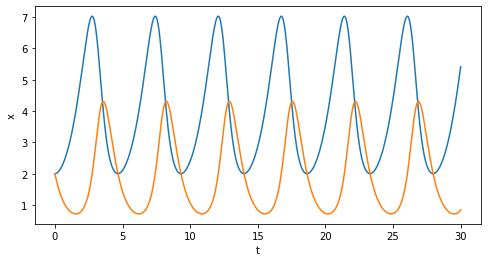

In [37]:
%matplotlib inline
"""
Exercise 8.2: The Lotka Volterra equation

"""

from numpy import array, arange
from pylab import plot,xlabel,ylabel,show,figure

alpha = 1
beta = gamma = 0.5
delta = 2

def f(r,t):
    x = r[0]                    # x value
    y = r[1]                    # y value
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return array([fx,fy],float) # return vector f
    
# Initialize

a = 0       # start of interval
b = 30      # end of interval
N = 1000    # Number of steps
h = (b-a)/N # step size

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([2.0,2.0],float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6

figure(figsize=(8,4))
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
ylabel("x")
show()

** Discussion:** With a small number of rabbits, the foxes die out, this allows the population of rabbits to increase, which allows the population of foxes to increase, which then depl**eat** the rabbit population ... repeat.

---
## Exercise 8.3:  The Lorenz equations

One of the most celebrated sets of differential equations in physics is the Lorenz equations:

$$ \frac{dx}{dt} = \sigma(y - x), \qquad \frac{dy}{dt} = rx - y - xz, \qquad \frac{dz}{dt} = xy - bz, $$

where $\sigma$, $r$, and $b$ are constants.  (The names $\sigma$, $r$, and $b$ are odd, but traditional--they are always used in these equations for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns.  The reason for their fame is that they were one of the first incontrovertible examples of _deterministic chaos_, the occurrence of apparently random motion even though there is no randomness built into the equations.  We encountered a different example of chaos in the logistic map of Exercise 3.6.

* a) Write a program to solve the Lorenz equations for the case $\sigma=10$, $r=28$, and $b=\frac83$ in the range from $t=0$ to $t=50$ with initial conditions $(x,y,z) = (0,1,0)$.  Have your program make a plot of $y$ as a function of time.  Note the unpredictable nature of the motion.  (Hint: If you base your program on previous ones, be careful.    This problem has parameters $r$ and $b$ with the same names as variables in previous programs--make sure to give your variables new names, or use different names for the parameters, to avoid introducing errors into your code.)
  
* b) Modify your program to produce a plot of $z$ against $x$.  You should see a picture of the famous "strange attractor" of the Lorenz equations, a lop-sided butterfly-shaped plot that never repeats itself.

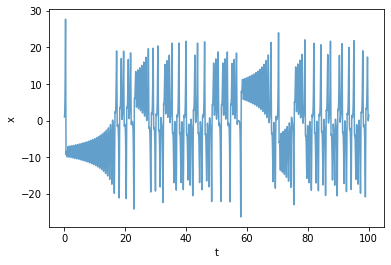

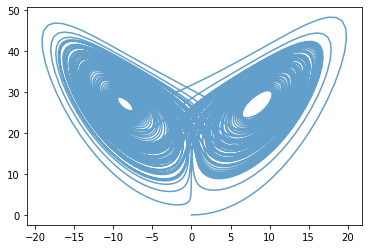

In [14]:
"""
Exercise 8.3: The Lorentz Equation

"""

from numpy import array, arange
from pylab import plot,xlabel,ylabel,show

sigma = 10
rcst = 28
bcst = 8/3.

def f(r,t):
    x = r[0]                    # x value
    y = r[1]                    # y value
    z = r[2]
    fx = sigma*(y-x)
    fy = rcst*x - y - x*z
    fz = x*y - bcst*z
    return array([fx,fy,fz],float) # return vector f
    
# Initialize

a = 0       # start of interval
b = 100      # end of interval
N = 10000    # Number of steps
h = (b-a)/N # step size

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
zpoints = []

r = array([0.0,1.0,0.0],float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6


#plot(tpoints,xpoints)
plot(tpoints,ypoints,alpha=0.7)
#plot(tpoints,zpoints)
xlabel("t")
ylabel("x")
show()

plot(xpoints,zpoints,alpha=0.7)
show()

---
## Exercise 8.4

Building on the results from Example 8.6 above, calculate the motion of a nonlinear pendulum as follows.

* a) Write a program to solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a $10\,$cm arm.  Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta=179^\circ$ from the vertical.  Make a graph of $\theta$ as a function of time.

* b) Animate it

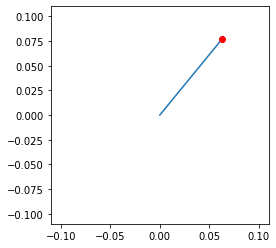

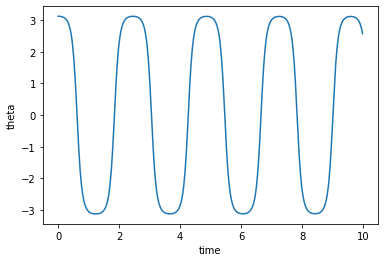

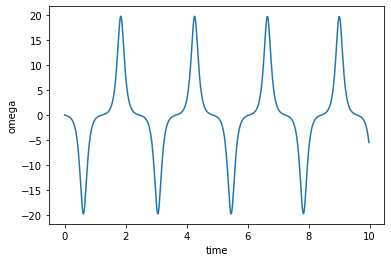

In [15]:
"""
Exercise 8.4: The Nonlinear Pendulum

"""
from math import cos,sin,pi
from numpy import array, arange
from pylab import plot,xlabel,ylabel,show
from matplotlib import animation, rc,rcParams
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

g = 9.81
l = 0.1

def f(r,t):
    theta = r[0]                    # x value
    omega = r[1]                    # y value
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega],float) # return vector f
    
# Initialize

a = 0       # start of interval
b = 10      # end of interval
N = 500    # Number of steps
h = (b-a)/N # step size

tpoints = arange(a,b,h)
thetapoints = []   # theta
omegapoints = []   # omega

r = array([179*pi/180,0.0],float)

fig, ax = plt.subplots()
ax.set_aspect('equal')

for t in tpoints:
    thetapoints.append(r[0])
    omegapoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    x = l * sin(r[0])
    y = -l * cos(r[0])
    ax.plot([0,x],[0,y])
    ax.plot([x],[y],'ro')
    ax.set_ylim([-.11,.11])
    ax.set_xlim([-.11,.11])
    clear_output(wait=True)
    display(fig)
    ax.clear()

plt.close()
fig, ax = plt.subplots()

                      
plot(tpoints,thetapoints)
#plot(tpoints,ypoints)
xlabel("time")
ylabel("theta")
show()

plot(tpoints,omegapoints)
xlabel("time")
ylabel("omega")
show()

---
## Exercise 8.6: Harmonic and Anharmonic Oscillators

The simple harmonic oscillator arises in many physical problems, in
mechanics, electricity and magnetism, and condensed matter physics, among
other areas.  Consider the standard oscillator equation
$$
{d^2 x\over d t^2} = -\omega^2 x.
$$

1. Using the methods described in the preceding section, turn this
  second-order equation into two coupled first-order equations.  Then write
  a program to solve them for the case $\omega=1$ in the range from $t=0$
  to $t=50$.  A second-order equation requires two initial conditions, one
  on $x$ and one on its derivative.  For this problem use $x=1$ and $dx/dt = 0$ as initial conditions.  Have your program make a graph
  showing the value of $x$ as a function of time.

2. Now increase the amplitude of the oscillations by making the initial
  value of $x$ bigger-say $x=2$-and confirm that the period of the
  oscillations stays roughly the same.
  
3. Modify your program to solve for the motion of the anharmonic
  oscillator described by the equation
$$
{d^2 x\over dt^2} = -\omega^2 x^3.
$$
Again take $\omega=1$ and initial conditions $x=1$ and $dx/dt=0$ and
make a plot of the motion of the oscillator.  Again increase the amplitude.
You should observe that the oscillator oscillates faster at higher
amplitudes.  (You can try lower amplitudes too if you like, which should be
slower.)  The variation of frequency with amplitude in an anharmonic
oscillator was studied previously in Exercise 5.10.
4. Modify your program so that instead of plotting $x$ against $t$, it
  plots $dx/dt$ against $x$, i.e., the "velocity" of the oscillator
  against its "position."  Such a plot is called a phase
    space plot.
5. The van der Pol oscillator, which appears in electronic
  circuits and in laser physics, is described by the equation
$$
{d^2 x\over dt^2} - \mu (1-x^2) {dx\over dt} + \omega^2 x = 0.
$$
Modify your program to solve this equation from $t=0$ to $t=20$ and hence
make a phase space plot for the van der Pol oscillator with $\omega=1$,
$\mu=1$, and initial conditions $x=1$ and $dx/dt=0$.  Try it also for
$\mu=2$ and $\mu=4$ (still with $\omega=1$).  Make sure you use a small
enough value of the time interval $h$ to get a smooth, accurate phase space
plot.


**Solution**: The programs are essentially the same for each part.  Only the definition of the function $f(x)$ representing the right-hand side of the differental equation changes.  Here's part A

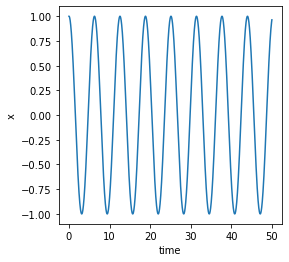

In [16]:
from numpy import array, arange
from pylab import plot, show, xlabel, ylabel

omega = 1
a = 0.
b = 50.
N = 10000
h = (b-a)/N

#Function for RHS
def f(r,t):
    x = r[0]
    v = r[1]
    fx = v
    fv = -omega**2 * x
    return array([fx,fv],float)

#initial values
x = 1.0
v = 0.0
r = array([x,v],float)

# lists for making plots
tpoints = arange(a,b,h)
xpoints = []
vpoints = []

#Main loop
for t in tpoints:
    xpoints.append(r[0])
    vpoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.4*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3 + k4)/6
    
# Make plot
fig, ax = plt.subplots(figsize=(4,4))
plot(tpoints,xpoints)
xlabel("time")
ylabel("x")
show()

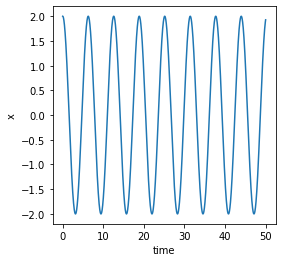

In [17]:
# B: Double amplitude (x = 2) and note that output period is essentially unchaged
# (there's the same number of cycles in the output plot)
from numpy import array, arange
from pylab import plot, show, xlabel, ylabel

omega = 1
a = 0.
b = 50.
N = 10000
h = (b-a)/N

#Function for RHS
def f(r,t):
    x = r[0]
    v = r[1]
    fx = v
    fv = -omega**2 * x
    return array([fx,fv],float)

#initial values
x = 2.0
v = 0.0
r = array([x,v],float)

# lists for making plots
tpoints = arange(a,b,h)
xpoints = []
vpoints = []

#Main loop
for t in tpoints:
    xpoints.append(r[0])
    vpoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.4*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3 + k4)/6
    
# Make plot
fig, ax = plt.subplots(figsize=(4,4))
plot(tpoints,xpoints)
xlabel("time")
ylabel("x")
show()

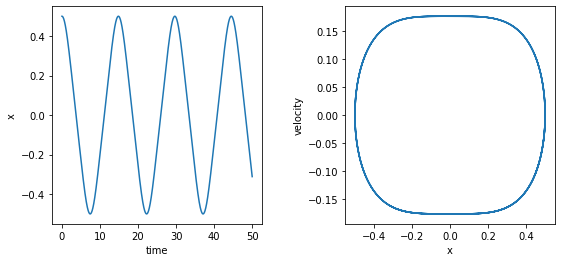

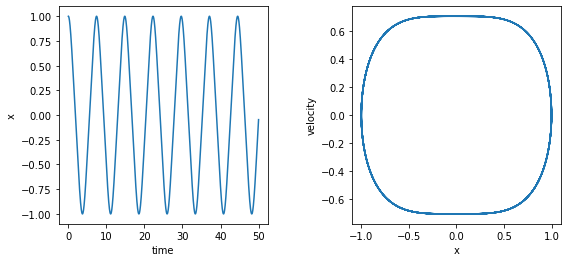

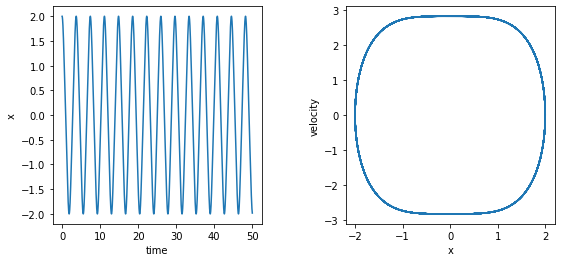

In [18]:
# Anharmonic oscillator (part C & D)

from numpy import array, arange
from matplotlib.pyplot import plot, show, xlabel, ylabel
import matplotlib.pyplot as plt

omega = 1
a = 0.
b = 50.
N = 10000
h = (b-a)/N

xlist = [0.5,1.0,2.0]

#Function for RHS
def f(r,t):
    x = r[0]
    v = r[1]
    fx = v
    fv = -omega**2 * x**3
    return array([fx,fv],float)



for x in xlist:
    #initial values
    v = 0.0
    r = array([x,v],float)
    
    # lists for making plots
    tpoints = arange(a,b,h)
    xpoints = []
    vpoints = []

    #Main loop
    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.4*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3 + k4)/6

    # Make plot
    fig,ax = plt.subplots(1,2,figsize=(9,4))
    ax[0].plot(tpoints,xpoints)
    ax[1].plot(xpoints,vpoints)
    ax[0].set_xlabel("time")
    ax[0].set_ylabel("x")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("velocity")
    plt.subplots_adjust(wspace=.4)
    show()

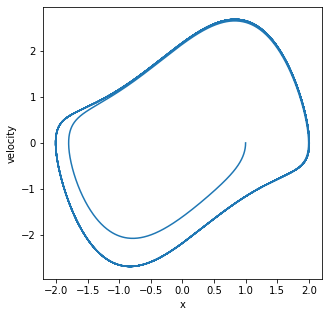

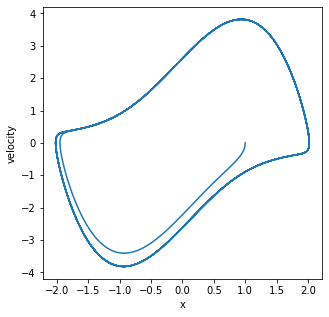

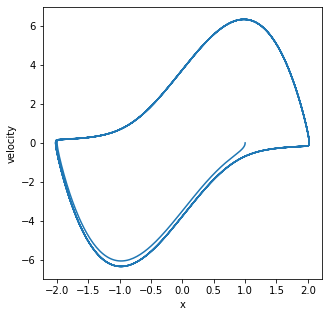

In [19]:
# van der Pol oscillator (Part E)
from numpy import array, arange
from pylab import plot, show, xlabel, ylabel

mulist = [1, 2, 4]
a = 0.
b = 50.
N = 10000
h = (b-a)/N

#Function for RHS
def f(r,t):
    x = r[0]
    v = r[1]
    fx = v
    fv = -x + mu*(1-x*x)*v
    return array([fx,fv],float)

for mu in mulist:
    #initial values
    x = 1.0
    v = 0.0
    r = array([x,v],float)
    
    # lists for making plots
    tpoints = arange(a,b,h)
    xpoints = []
    vpoints = []

    #Main loop
    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.4*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3 + k4)/6

    # Make plot
    fig,ax = plt.subplots(figsize=(5,5))
    plot(xpoints,vpoints)
    ax.set_xlabel("x")
    ax.set_ylabel("velocity")
    show()

---
## Exercise 8.7:  Trajectory with air resistance

Many elementary mechanics problems deal with the physics of objects moving or flying through the air, but they almost always ignore friction and air resistance to make the equations solvable.  If we're using a computer, however, we don't need solvable equations.  

Consider, for instance, a spherical cannonball shot from a cannon standing on level ground.  The air resistance on a moving sphere is a force in the opposite direction to the motion with magnitude

$$ F = \frac{1}{2} \pi R^2\rho C v^2, $$

where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the velocity, and $C$ is the so-called `coefficient of drag` (a property of the shape of the moving object, in this case a sphere).

* a) Starting from Newton's second law, $F = ma$, show that the equations of motion for the position $(x,y)$ of the cannonball are

$$
\ddot{x} = - {\pi R^2\rho C\over2m}\,
             \dot{x}\sqrt{\dot{x}^2+\dot{y}^2},
\qquad
\ddot{y} =  - g - {\pi R^2\rho C\over2m}\,
             \dot{y}\sqrt{\dot{x}^2+\dot{y}^2},
$$

where $m$ is the mass of the cannonball, $g$ is the acceleration due to gravity, and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives of $x$ with respect to time.

* b) Change these two second-order equations into four first-order equations using the methods you have learned, then write a program that solves the equations for a cannonball of mass $1$ kg and radius $8$ cm, shot at $30^\circ$ to the horizontal with initial velocity $100 \mathrm{ms}^{-1}$.  The density of air is $\rho=1.22 \text{kg} \text{m}^{-3} $ and the coefficient of drag for a sphere is $C = 0.47$.  Make a plot of the trajectory of the cannonball (i.e., a graph of $y$ as a function of $x$).
  
* c) When one ignores air resistance, the distance traveled by a projectile does not depend on the mass of the projectile.  In real life, however, mass certainly does make a difference.  Use your program to estimate the total distance traveled (over horizontal ground) by the cannonball above, and then experiment with the program to determine  whether the cannonball travels further if it is heavier or lighter.  You could, for instance, plot a series of trajectories for cannonballs of different masses, or you could make a graph of distance traveled as a function of mass.  Describe briefly what you discover.


##### Part A:  Derive equations:

First, let $ k = \frac{1}{2} \pi R^2\rho C $, a component of our drag force.

Begin with x dimension:

$$ F_x = ma_x \qquad \text{Newton's Second Law}$$

$$ F_x = ma_x - kv^2 \qquad \text{Include Drag Force}$$

$$ F_x = -k \sqrt{v_x^2 + v_y^2} v_x \qquad \text{X acceleration is zero, note components of v squared}$$

$$ \frac{F_x}{m} = \frac{-k \sqrt{v_x^2 + v_y^2} v_x}{m} \qquad \text{Divide both sides by mass}$$

$$ \ddot{x} = \frac{-k \sqrt{\dot{x}^2 + \dot{y}^2} \dot{x}}{m} \qquad \text{Substitute}$$

$$ \ddot{x} = \frac{-k \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2} }{m} \qquad \text{Reorder Terms}$$

$$ \ddot{x} = \frac{-\frac{1}{2} \pi R^2\rho C \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2} }{m} \qquad \text{Expand k}$$

$$ \ddot{x} = - \frac{\pi R^2\rho C}{2m} \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2} \qquad \text{Reorder Terms}$$

Next, the y dimension:

$$ F_y = ma_y \qquad \text{Newton's Second Law}$$

$$ F_y = ma_y - kv^2 \qquad \text{Include Drag Force}$$

$$ F_y = -mg - k \sqrt{v_x^2 + v_y^2} v_y \qquad \text{Y acceleration is gravity, note components of v squared}$$

$$ \frac{F_y}{m} = \frac{-mg}{m} \frac{-k \sqrt{v_x^2 + v_y^2} v_y}{m} \qquad \text{Divide both sides by mass}$$

$$ \ddot{y} = -g - \frac{k \sqrt{\dot{x}^2 + \dot{y}^2} \dot{y}}{m} \qquad \text{Substitute}$$

$$ \ddot{y} = -g - \frac{k \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2} }{m} \qquad \text{Reorder Terms}$$

$$ \ddot{y} = -g - \frac{\frac{1}{2} \pi R^2\rho C \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2} }{m} \qquad \text{Expand k}$$

$$ \ddot{y} = -g - \frac{\pi R^2\rho C}{2m} \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2} \qquad \text{Reorder Terms}$$


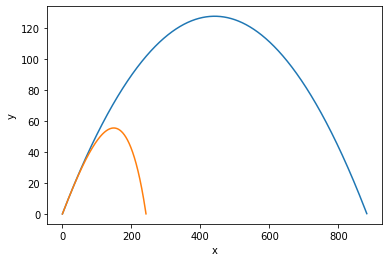

In [20]:
"""
Exercise 8.7: Trajectory with Air Resistance
"""

from math import sin,cos,pi,sqrt
from numpy import array
from pylab import plot,xlabel,ylabel,show


m = 1
R = 0.08
v0 = 100
theta = 30*pi/180.
rho = 1.22
C_arr = [0.,0.47]    # without air resistance and with
g = 9.81

def f(r,t):
    vx = r[2]
    vy = r[3]
    v = sqrt(vx**2 + vy**2)
    fx = vx
    fy = vy
    fvx =     -pi*R**2*rho*C/(2*m)*vx*v
    fvy = -g - pi*R**2*rho*C/(2*m)*vy*v
    return array([fx,fy,fvx,fvy],float) # return vector f
    
# Initialize

h = 0.01

for C in C_arr:
    r = array([0.0,0.0, v0*cos(theta), v0*sin(theta) ])
    t = 0
    xpoints = []
    ypoints = []

    while r[1] >= 0.0:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3, t+h)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
        t += h

    plot(xpoints,ypoints)
    xlabel("x")
    ylabel("y")
show()

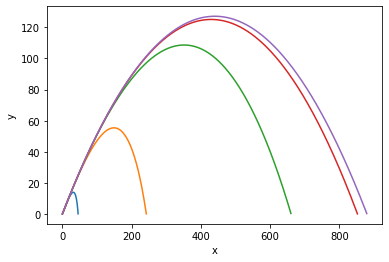

In [21]:
"""
Exercise 8.7: Trajectory with Air Resistance and variable mass
"""

from math import sin,cos,pi,sqrt
from numpy import array
from pylab import plot,xlabel,ylabel,show


m_arr = [0.1,1,10,100,1000]
R = 0.08
v0 = 100
theta = 30*pi/180.
rho = 1.22
C =0.47
g = 9.81

def f(r,t):
    vx = r[2]
    vy = r[3]
    v = sqrt(vx**2 + vy**2)
    fx = vx
    fy = vy
    fvx =     -pi*R**2*rho*C/(2*m)*vx*v
    fvy = -g - pi*R**2*rho*C/(2*m)*vy*v
    return array([fx,fy,fvx,fvy],float) # return vector f
    
# Initialize

h = 0.01

for m in m_arr:
    r = array([0.0,0.0, v0*cos(theta), v0*sin(theta) ])
    t = 0
    xpoints = []
    ypoints = []

    while r[1] >= 0.0:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3, t+h)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
        t += h

    plot(xpoints,ypoints)
    xlabel("x")
    ylabel("y")
show()

**Discussion:** Mass makes a big difference when it is small, but at the higher end the effects of drag are minimized. 

---
## Exercise 8.9: Vibration in a one-dimensional system

In Example 6.2 on page 235 we studied the motion of a system of $N$
identical masses (in zero gravity) joined by identical linear springs.

As we showed, the horizontal displacements $\xi_i$ of masses  $i=1\ldots N$
satisfy equations of motion
$$
m {d^2\xi_1\over dt^2} = k(\xi_2-\xi_1) + F_1,\\
m {d^2\xi_i\over dt^2} = k(\xi_{i+1}-\xi_i) + k(\xi_{i-1}-\xi_i) + F_i\,,\\
m {d^2\xi_N\over dt^2} = k(\xi_{N-1}-\xi_N) + F_N.
$$
where $m$ is the mass, $k$ is the spring constant, and $F_i$ is the
external force on mass $i$.  In Example 6.2 we showed how these equations
could be solved by guessing a form for the solution and using a matrix
method.  Here we'll solve them more directly.


1. Write a program to solve for the motion of the masses using the
  fourth-order Runge--Kutta method for the case we studied previously where
  $m=1$ and $k=6$, and the driving forces are all zero except for $F_1 =
  \cos\omega t$ with $\omega=2$.  Plot your solutions for the
  displacements $\xi_i$ of all the masses as a function of time from $t=0$
  to $t=20$ on the same plot.  Write your program to work with
  general $N$, but test it out for small values-$N=5$ is a reasonable
  choice.

  You will need first of all to convert the $N$ second-order equations of
  motion into $2N$ first-order equations.  Then combine all of the
  dependent variables in those equations into a single large
  vector $\vec{r}$ to which you can apply the Runge-Kutta method in the
  standard fashion.
2. Modify your program to create an animation of the movement of the
  masses, represented as spheres on the computer screen.  You will probably
  find the rate function discussed in Section 3.5 useful for making
  your animation run at a sensible speed.


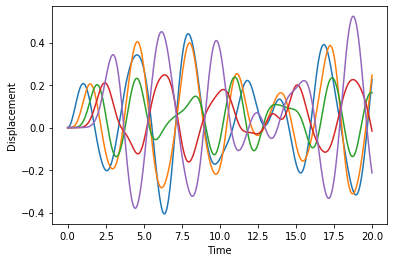

In [23]:
# Example solution for part a


from math import cos
from numpy import empty,zeros,arange,concatenate
from pylab import plot,show,xlabel,ylabel

N = 5
m = 1.0
k = 6.0
omega = 2.0

def f(r,t):
    xi = r[:N]
    nu = r[N:]
    fxi = empty(N,float)
    fnu = empty(N,float)
    
    fxi[0] = nu[0]
    fnu[0] = k*(xi[1]-xi[0]) + cos(omega*t)
    for i in range(1,N-1):
        fxi[i] = nu[i]
        fnu[i] = k*(xi[i+1]-xi[i]) + k*(xi[i-1]-xi[i])
    fxi[N-1] = nu[N-1]
    fnu[N-1] = k*(xi[N-2]-xi[N-1])
    
    return concatenate([fxi,fnu])

a = 0.
b = 20.
n = 1000
h = (b-a)/n
r = zeros(2*N,float)
xipoints = empty([N,n],float)

for i in range(n):
    t = i*h
    xipoints[:,i] = r[:N]
    
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6

tpoints = arange(a,b,h)

for i in range(N):
    plot(tpoints,xipoints[i,:])
xlabel("Time")
ylabel("Displacement")
show()
        
        

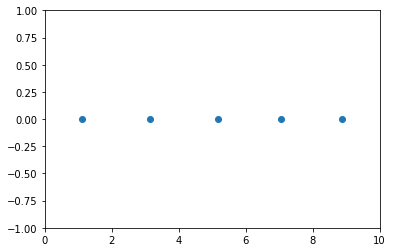

In [24]:
# Example solution for part b

from math import cos
from numpy import empty,zeros,arange,concatenate,linspace
from pylab import plot,show,xlabel,ylabel,xlim,ylim,close,subplots
from IPython.display import clear_output, display
import time

N = 5
m = 1.0
k = 6.0
omega = 2.0

def f(r,t):
    xi = r[:N]
    nu = r[N:]
    fxi = empty(N,float)
    fnu = empty(N,float)
    
    fxi[0] = nu[0]
    fnu[0] = k*(xi[1]-xi[0]) + cos(omega*t)
    for i in range(1,N-1):
        fxi[i] = nu[i]
        fnu[i] = k*(xi[i+1]-xi[i]) + k*(xi[i-1]-xi[i])
    fxi[N-1] = nu[N-1]
    fnu[N-1] = k*(xi[N-2]-xi[N-1])
    
    return concatenate([fxi,fnu])

a = 0.
b = 20.
n = 1000
h = (b-a)/n
r = zeros(2*N,float)
xipoints = empty([N,n],float)



for i in range(n):
    t = i*h
    xipoints[:,i] = r[:N]
    
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6

tpoints = arange(a,b,h)

equil_pos = linspace(1.,9.,5)
y_pos = zeros(N)

fig, ax = subplots()

for i in range(0,n-1,10):
    delta = xipoints[:,i]
    pos = equil_pos + delta
    plot(pos,y_pos,'o')
    xlim([0,10])
    ylim([-1,1])
    clear_output(wait=True)
    display(fig)
    ax.clear()
close()

---
## Exercise 8.12: Orbit of the Earth


Use the Verlet method to calculate the orbit of the Earth around
the Sun.  The equations of motion for the position $\vec{r} = (x,y)$ of the
planet in its orbital plane are the same as those for any orbiting body and
are derived in Exercise~8.10 on page 361.  In vector form, they are
$$
{d^2\vec{r}\over dt^2} = -GM {\vec{r}\over r^3}\,,
$$
where $G=6.6738\times10^{-11}\,\mathrm{m^3\,kg^{-1}\,s^{-2}}$ is Newton's
gravitational constant and $M=1.9891\times10^{30}\,$kg is the mass of the
Sun.

The orbit of the Earth is not perfectly circular, the planet being
sometimes closer to and sometimes further from the Sun.  When it is at its
closest point, or perihelion, it is moving precisely tangentially
(i.e., perpendicular to the line between itself and the Sun) and it has
distance $1.4710\times10^{11}\,$m from the Sun and linear velocity
$3.0287\times10^4\,\mathrm{m\,s^{-1}}$.

1. Write a program to calculate the orbit of the Earth using the Verlet
  method, Eqs. (8.77) and (8.78), with a time-step of $h=1$ hour.  Make a
  plot of the orbit, showing several complete revolutions about the Sun.
  The orbit should be very slightly, but visibly, non-circular.
2. The gravitational potential energy of the Earth is $-GMm/r$, where
  $m=5.9722\times10^{24}\,$kg is the mass of the planet, and its kinetic
  energy is $\frac{1}{2} mv^2$ as usual.  Modify your program to calculate both
  of these quantities at each step, along with their sum (which is the
  total energy), and make a plot showing all three as a function of time on
  the same axes.  You should find that the potential and kinetic energies
  vary visibly during the course of an orbit, but the total energy remains
  constant.
2. Now plot the total energy alone without the others and you should be
  able to see a slight variation over the course of an orbit.  Because
  you're using the Verlet method, however, which conserves energy in the
  long term, the energy should always return to its starting value at the
  end of each complete orbit.



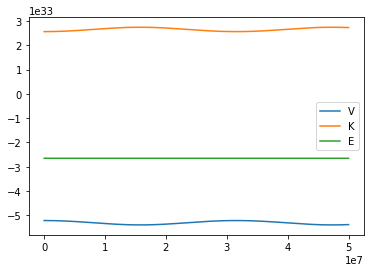

In [26]:
from math import sqrt
from numpy import array, arange
from pylab import  plot, show,legend

# Constants
G = 6.6738e-11
M = 1.9891e30
m = 5.9722e24

x0 = 1.5210e11
y0 = 0.0
vx0 = 0.0
vy0 = 2.9291e4

a = 0
b = 50e6
h = 3600

# magnitude of vector
def mag(r):
    return sqrt(sum(r*r))

# rhs of equations
def f(r):
    return -G*M*r/mag(r)**3
    
# PE function
def V(r):
    return -G*M*m/mag(r)
    
#KE function
def T(v):
    return 0.5*m*sum(v*v)

# initial values
r = array([x0,y0])
v = array([vx0,vy0])
vhalf = v + 0.5*h*f(r)

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
Vpoints = []
Tpoints = []
Epoints = []

# main loop
for t in arange(a,b,h):
    xpoints.append(r[0])
    ypoints.append(r[1])
    Vpoints.append(V(r))
    Tpoints.append(T(v))
    Epoints.append(V(r)+T(v))
    r += h*vhalf
    k = h*f(r)
    v = vhalf + 0.5*k
    vhalf += k
    
# Make a plot
plot(tpoints,Vpoints,label="V")
plot(tpoints,Tpoints,label="K")
plot(tpoints,Epoints, label="E")
legend()
show()

The top and bottom curves are the kinetic and potential energies respectively, and the variation over time is clearly visible.  The middle curve is the total energy, which is essentially constant.

---
## Exercise 8.15: Double Pendulum

If you did Exercise 8.4 you will have created a program to
calculate the movement of a nonlinear pendulum.  Although it is nonlinear,
the nonlinear pendulum's movement is nonetheless perfectly regular and
periodic-there are no surprises.  A  double pendulum, on the other
hand, is completely the opposite-chaotic and unpredictable.  A double
pendulum consists of a normal pendulum with another pendulum hanging from
its end.  For simplicity let us ignore friction, and assume that both
pendulums have bobs of the same mass $m$ and massless arms of the same
length $\ell$. 

Note: Full problem statement is in the text.

1. Derive an expression for the total energy $E = T + V$ of the system
  in terms of the variables $\theta_1$, $\theta_2$, $\omega_1$,
  and~$\omega_2$, plus the constants $g$, $\ell$, and $m$.
2. Write a program using the fourth-order Runge--Kutta method to solve
  the equations of motion for the case where $\ell=40\,$cm, with the
  initial conditions $\theta_1=\theta_2=90^\circ$ and
  $\omega_1=\omega_2=0$.  Use your program to calculate the total energy of
  the system assuming that the mass of the bobs is $1\,$kg each, and make a
  graph of energy as a function of time from $t=0$ to $t=100$ seconds.

  Because of energy conservation, the total energy should be constant over
  time (actually it should be zero for this particular set of initial
  conditions), but you will find that it is not perfectly constant because
  of the approximate nature of the solution of the differential equation.
  Choose a suitable value of the step size $h$ to ensure that the variation
  in energy is less than $10^{-5}$ Joules over the course of the
  calculation.

3. Make a copy of your program and modify the copy to create a second
  program that does not produce a graph, but instead makes an animation of
  the motion of the double pendulum over time.  At a minimum, the animation
  should show the two arms and the two bobs.


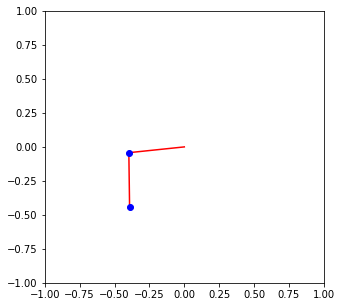

In [35]:
from math import sin,cos,pi
from numpy import arange, array
from pylab import plot,xlim,ylim,subplots,close
from IPython.display import clear_output, display

g = 9.81
l = 0.4
R = 0.05
W = 0.01
stepsperframe=30

def f(r):
    theta1 = r[0]
    theta2 = r[1]
    omega1 = r[2]
    omega2 = r[3]
    ftheta1 = omega1
    ftheta2 = omega2
    fomega1 = -(omega1*omega1*sin(2*theta1-2*theta2) \
            + 2*omega2*omega2*sin(theta1-theta2) \
            + (3*sin(theta1)+sin(theta1-2*theta2))*g/l) / \
              (3 - cos(2*theta1-2*theta2))
    fomega2 = (4*omega1*omega1*sin(theta1-theta2) \
               + omega2*omega2*sin(2*theta1-2*theta2) \
               - 2*(sin(theta2) - sin(2*theta1-theta2))*g/l) / \
                 (3-cos(2*theta1-2*theta2))
    return array([ftheta1,ftheta2,fomega1,fomega2])

# Main program
h = 1.0e-3
theta1 = theta2 = 0.5*pi
omega1 = omega2 = 0.
r = array([theta1,theta2,omega1,omega2])

fig, ax = subplots(figsize=(5,5))

for ii in range(1000):
    for i in range(stepsperframe):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
        
    theta1 = r[0]
    theta2 = r[1]
    x1 = l*sin(theta1)
    y1 = -l*cos(theta1)
    x2 = l*(sin(theta1) + sin(theta2))
    y2 = -l*(cos(theta1)+cos(theta2))

    plot([0,x1],[0,y1],'r')
    plot([x1,x2],[y1,y2],'r')
    plot(x1,y1,'bo',)
    plot(x2,y2,'bo')
    xlim([-1,1])
    ylim([-1,1])
    clear_output(wait=True)
    display(fig)
    ax.clear()
close()